In [1]:
# Note: this file works with the compact dataset file SmallPatSurvRaw.csv available in my github and shared in my google drive

# Install autotime extension to measure code execution duration

!pip install ipython-autotime

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
%load_ext autotime

time: 342 µs (started: 2022-12-05 10:19:37 -05:00)


In [3]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import time
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
import scipy.stats
from scipy import interp
import statsmodels.formula.api as smf
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2
from itertools import product


time: 27 s (started: 2022-12-05 10:19:37 -05:00)


In [4]:
# The csv file is in my google drive and shared with anyone with the link 


# Per Kaggle: source of the dataset: https://journals.lww.com/ccmjournal/Citation/2019/01001/33__THE_GLOBAL_OPEN_SOURCE_SEVERITY_OF_ILLNESS.36.aspx

# Please see Data_Dictionary.csv file for explanation / definitions of features 

#IF USING GOOGLE DRIVE UNCOMMENT THE FOLLOWING 2 LINES:
#from google.colab import drive
#drive.mount('/content/drive')

time: 512 µs (started: 2022-12-05 10:20:04 -05:00)


In [5]:

#IF USING GOOGLE DRIVE (copying file shortcut into end user's own google drive will enable access)
#Uncomment and edit the following path and filename as needed:
#data=pd.read_csv(r'/content/drive/MyDrive/820PublicData/SmallPatSurvRaw.csv',header=0)

#IF NOT USING GOOGLE DRIVE:
#Uncomment and edit the following path and filename as needed:
#data=pd.read_csv(r'/Users/Lj4b 1 2/Documents/Ryerson/CIND820BigDataProject/Data/SmallPatSurvRaw.csv',header=0)

time: 113 ms (started: 2022-12-05 10:20:04 -05:00)


In [6]:
pd.options.display.min_rows = 186
data.isnull().sum()

hospital_death                    0
age                             772
bmi                             444
elective_surgery                  0
ethnicity                       230
gender                            6
height                          234
hospital_admit_source          2156
icu_admit_source                 11
icu_id                            0
icu_stay_type                     0
icu_type                          0
pre_icu_los_days                  0
readmission_status                0
weight                          313
gcs_eyes_apache                 366
gcs_motor_apache                366
gcs_unable_apache               170
gcs_verbal_apache               366
intubated_apache                110
ventilated_apache               110
aids                            110
cirrhosis                       110
diabetes_mellitus               110
hepatic_failure                 110
immunosuppression               110
leukemia                        110
lymphoma                    

time: 26.7 ms (started: 2022-12-05 10:20:04 -05:00)


In [7]:
# Eliminate features that: 
# 1. do not provide any information value (i.e. 'encounter_id', 'patient_id', 'hospital_id') 
# 2. are the predicted probabilities from the APACHE IV model ('apache_4a_hospital_death_prob','apache_4a_icu_death_prob') 
# 3. OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
# data.drop(['encounter_id','patient_id','readmission_status','hospital_id','icu_id','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

time: 1.5 ms (started: 2022-12-05 10:20:05 -05:00)


In [8]:
def analyse_df(df, corr_limit = 0.75):
    """Analyse any dataframe and print results
    * Print df Shape, duplicate rows qnt, memory usage, data types and call DataFrame.describe()
    * Check Missing values in each columns, returning qnt. and percentage 
    * Check Linear Correlation between columns, return Pearson number

    Keyword arguments:
    df -- Any DataFrame
    corr_limit -- Correlation Limit (Pearson) to define if relationship exists (default 0.75)
    """   

    print('General Info:')
    print(f'{df.shape[0]} Rows {df.shape[1]} Columns'
          f'\n{df.duplicated().sum()} Duplicated Rows'
          f'\nMemory Usage: {df.memory_usage().sum()/(1024*1024):.2f}Mb')
    
    # Checking Data Types
    int_list, float_list,object_list,bool_list,other_list =[[] for i in range(5)]
    for col in df.columns:
        if df[col].dtype == 'int64':
            int_list.append(col)
        elif df[col].dtype == 'float64':
            float_list.append(col)
        elif df[col].dtype == 'object':
            object_list.append(col)
        elif df[col].dtype == 'boolean':
            bool_list.append(col)
        else:
            other_list.append(col)
            
    for type_list,data_type in zip([int_list, float_list,object_list,bool_list,other_list],
                                   ['int64','float64','object','boolean','other']):
        if len(type_list)>0:
            print(f'\nColumns {data_type}: {type_list}')
            
    # General statistics
    display(df.describe())
    
    # Checking Missing Values in each columns
    print('\nChecking Missing Values:')
    col_with_missing_counter = 0
    for col in df.columns:
        qnt_missing = df[col].isna().sum()
        if qnt_missing > 0:
            col_with_missing_counter +=1
            print(f'Column "{col}" has {qnt_missing} missing values ({qnt_missing/df.shape[0]:.2%})')
    if col_with_missing_counter ==0 :
        print('Analyzed DataFrame has no missing values')
        
    # Checking linear correlation between columns
    print('\nChecking Linear Correlation:')
    df_corr = df.corr() # Correlation DataFrame
    ckecked_list =[] # Ensure that we won't print the same information twice
    cols_with_correlation_counter = 0
    for col in df_corr.columns:
        ckecked_list.append(col)
        for i in range(len(df_corr)):
            if ((df_corr[col][i] > corr_limit or df_corr[col][i] < -corr_limit) and
                (df_corr.index[i] not in ckecked_list)):
                cols_with_correlation_counter += 1
                print(f'Linear Correlation found between columns '
                      f'{df_corr.index[i]} and {col} -> Pearson coef. = {df_corr[col][i]:.2f}')         
    if cols_with_correlation_counter == 0:
        print('No linear correlation was found')

time: 2.72 ms (started: 2022-12-05 10:20:05 -05:00)


In [9]:
analyse_df(data)

General Info:
12001 Rows 31 Columns
0 Duplicated Rows
Memory Usage: 2.84Mb

Columns int64: ['hospital_death', 'elective_surgery', 'icu_id', 'readmission_status']

Columns float64: ['age', 'bmi', 'height', 'pre_icu_los_days', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

Columns object: ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,gcs_eyes_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,12001.000000,11229.000000,11557.000000,12001.000000,11767.000000,12001.000000,12001.000000,12001.0,11688.000000,11635.000000,...,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000,11891.000000
mean,0.499958,64.652240,28.661196,0.118657,169.442819,578.406883,1.015810,0.0,82.356521,3.141040,...,0.240854,0.478597,0.000841,0.021445,0.219073,0.017576,0.036078,0.010512,0.007064,0.030443
std,0.500021,16.413208,8.434800,0.323398,10.752413,220.575366,2.937868,0.0,25.444190,1.186044,...,0.427620,0.499563,0.028989,0.144868,0.413636,0.131411,0.186491,0.101993,0.083755,0.171811
min,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-3.825694,0.0,38.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,22.996985,0.000000,162.500000,498.000000,0.033333,0.0,64.800000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,27.193231,0.000000,170.000000,609.000000,0.150694,0.0,78.700000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,77.000000,32.522735,0.000000,177.800000,772.000000,0.455556,0.0,95.300000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,84.367361,0.0,186.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Checking Missing Values:
Column "age" has 772 missing values (6.43%)
Column "bmi" has 444 missing values (3.70%)
Column "ethnicity" has 230 missing values (1.92%)
Column "gender" has 6 missing values (0.05%)
Column "height" has 234 missing values (1.95%)
Column "hospital_admit_source" has 2156 missing values (17.97%)
Column "icu_admit_source" has 11 missing values (0.09%)
Column "weight" has 313 missing values (2.61%)
Column "gcs_eyes_apache" has 366 missing values (3.05%)
Column "gcs_motor_apache" has 366 missing values (3.05%)
Column "gcs_unable_apache" has 170 missing values (1.42%)
Column "gcs_verbal_apache" has 366 missing values (3.05%)
Column "intubated_apache" has 110 missing values (0.92%)
Column "ventilated_apache" has 110 missing values (0.92%)
Column "aids" has 110 missing values (0.92%)
Column "cirrhosis" has 110 missing values (0.92%)
Column "diabetes_mellitus" has 110 missing values (0.92%)
Column "hepatic_failure" has 110 missing values (0.92%)
Column "immunosuppressio

/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/1137909244.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


In [10]:
# Drop the following features (reason)
# hospital_admit_source (over 20K missing values)
data.drop(['hospital_admit_source'],axis =1, inplace = True)

time: 5.26 ms (started: 2022-12-05 10:20:05 -05:00)


In [11]:
# Drop rows where "pre_icu_los_days" <0
data=data[data.pre_icu_los_days >=0]

time: 3.96 ms (started: 2022-12-05 10:20:05 -05:00)


In [12]:
# Drop rows that have 2 or more missing values
df = data
df = df[df.isnull().sum(axis=1) < 2]

time: 17.1 ms (started: 2022-12-05 10:20:05 -05:00)


In [13]:
#Check for features with no variance
df.nunique()

hospital_death                    2
age                              74
bmi                            8100
elective_surgery                  2
ethnicity                         6
gender                            2
height                          190
icu_admit_source                  5
icu_id                          204
icu_stay_type                     3
icu_type                          8
pre_icu_los_days               2939
readmission_status                1
weight                         1633
gcs_eyes_apache                   4
gcs_motor_apache                  6
gcs_unable_apache                 1
gcs_verbal_apache                 5
intubated_apache                  2
ventilated_apache                 2
aids                              2
cirrhosis                         2
diabetes_mellitus                 2
hepatic_failure                   2
immunosuppression                 2
leukemia                          2
lymphoma                          2
solid_tumor_with_metastasis 

time: 42 ms (started: 2022-12-05 10:20:05 -05:00)


In [14]:
# Drop feature gcs_unable_apache and readmission_status (all values are the same)
df1 = df.copy()
df1.drop(['gcs_unable_apache','readmission_status'],axis =1, inplace = True)

time: 6.12 ms (started: 2022-12-05 10:20:05 -05:00)


In [15]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df1[['age']])
df1[['age']] = imputer.transform(df1[['age']])
df1.isnull().sum()

hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                      185
gender                           0
height                           0
icu_admit_source                 6
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_verbal_apache                0
intubated_apache                 0
ventilated_apache                0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
apache_3j_bodysystem             0
apache_2_bodysystem              0
dtype: int64

time: 30.4 ms (started: 2022-12-05 10:20:05 -05:00)


In [16]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df1[['ethnicity','gender','icu_admit_source']])
df1[['ethnicity','gender','icu_admit_source']] = imputer.transform(df[['ethnicity','gender','icu_admit_source']])
df1.isnull().sum()

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
weight                         0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_verbal_apache              0
intubated_apache               0
ventilated_apache              0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
dtype: int64

time: 26.5 ms (started: 2022-12-05 10:20:05 -05:00)


In [17]:
# Column apache_2_bodysystem has values 'Undefined Diagnoses' and 'Undefined diagnoses'.  Change all to 'Undefined diagnoses'
df1['apache_2_bodysystem']=df1['apache_2_bodysystem'].replace(['Undefined Diagnoses'],'Undefined diagnoses')

time: 2.61 ms (started: 2022-12-05 10:20:05 -05:00)


In [18]:
df1['hospital_death'].value_counts()

0    5690
1    5420
Name: hospital_death, dtype: int64

time: 3.67 ms (started: 2022-12-05 10:20:05 -05:00)


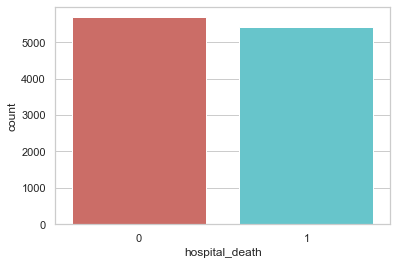

<Figure size 432x288 with 0 Axes>

time: 246 ms (started: 2022-12-05 10:20:05 -05:00)


In [19]:
sns.countplot(x='hospital_death',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [20]:
count_no_died = len(df1[df1['hospital_death']==0])
count_died = len(df1[df1['hospital_death']==1])
pct_of_no_died = count_no_died/(count_no_died+count_died)
print("percentage of 'patients did not die'is", pct_of_no_died*100)
pct_of_died = count_died/(count_no_died+count_died)
print("percentage of 'patients died' is", pct_of_died*100)

percentage of 'patients did not die'is 51.21512151215122
percentage of 'patients died' is 48.784878487848786
time: 6.45 ms (started: 2022-12-05 10:20:05 -05:00)


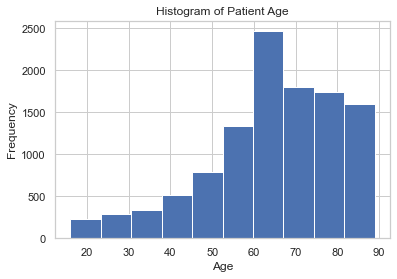

time: 345 ms (started: 2022-12-05 10:20:05 -05:00)


In [21]:
df1.age.hist()
plt.title('Histogram of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [22]:
df1.groupby('hospital_death').mean()

/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/2519479207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('hospital_death').mean()


,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,
0,60.976740,29.029288,0.173989,170.117587,653.029174,0.718555,84.084285,3.575571,5.600879,4.204921,0.121968,0.289982,0.000351,0.013533,0.240422,0.011072,0.024780,0.005448,0.004921,0.017575
1,68.436431,28.235569,0.060886,168.811629,512.463653,1.343564,80.496544,2.698339,4.332472,2.811624,0.355720,0.659225,0.001476,0.030812,0.202399,0.025646,0.048708,0.015683,0.009594,0.043358


time: 24.8 ms (started: 2022-12-05 10:20:06 -05:00)


Observations:

*   The average age of a patient that died is ~6 years older than that of one that does not die.
*   The 3 gcs scores are all lower for patients that died vs. did not die (the higher the gcs score, (generally) the healthier the patient).
*   Patients that died are more likely to have been either intubated or ventilated than patients that did not die.






In [23]:
pd.cut(df1['age'],bins=[16,20,30,40,50,60,70,80,np.inf])
age_groups = pd.cut(data['age'], bins=[16,20,30,40,50,60,70,80,np.inf])
pd.crosstab(age_groups, df1['hospital_death'])

hospital_death,0,1
age,,
"(16.0, 20.0]",95,20
"(20.0, 30.0]",323,78
"(30.0, 40.0]",361,140
"(40.0, 50.0]",548,291
"(50.0, 60.0]",1104,721
"(60.0, 70.0]",1238,1175
"(70.0, 80.0]",1126,1427
"(80.0, inf]",690,1162


time: 150 ms (started: 2022-12-05 10:20:06 -05:00)


<AxesSubplot:xlabel='age', ylabel='Density'>

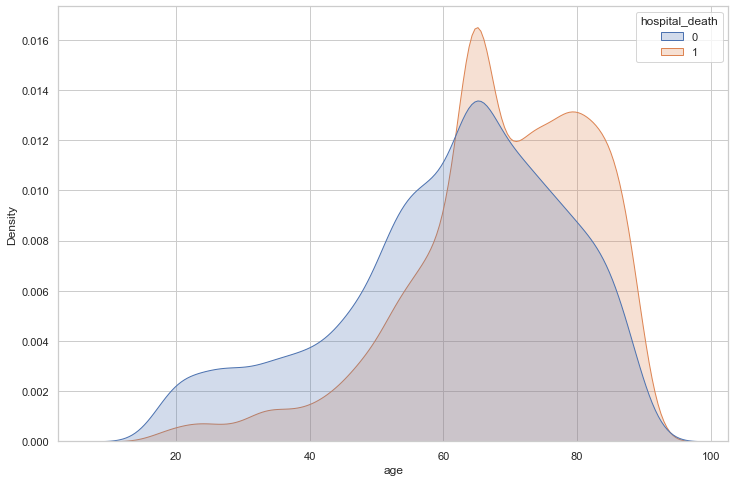

time: 326 ms (started: 2022-12-05 10:20:06 -05:00)


In [24]:
# Outcome (patient died / patient did not die) density by age
plt.figure(figsize=(12,8))
sns.kdeplot(data=df1,x='age',hue='hospital_death',fill=True)

In [25]:
df1.groupby('ethnicity').mean()

/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/4272701175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('ethnicity').mean()


,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
ethnicity,,,,,,,,,,,,,,,,,,,,,
African American,0.488500,58.717731,29.395248,0.081877,170.646983,554.935603,1.287564,85.264719,3.099356,4.878565,...,0.272309,0.471941,0.000000,0.019319,0.258510,0.011960,0.042318,0.011960,0.004600,0.029439
Asian,0.450617,63.658615,24.817440,0.092593,163.482716,555.901235,0.998645,66.612963,3.314815,5.086420,...,0.166667,0.382716,0.000000,0.037037,0.240741,0.018519,0.024691,0.012346,0.012346,0.030864
Caucasian,0.473690,65.523410,28.705805,0.127536,169.750429,596.189075,0.966482,82.783697,3.167113,5.022520,...,0.222854,0.466667,0.000892,0.020624,0.212375,0.017168,0.037793,0.010368,0.007804,0.031104
Hispanic,0.701493,65.559359,27.138621,0.059701,165.377114,392.902985,1.465630,74.121592,3.097015,4.783582,...,0.375622,0.497512,0.002488,0.039801,0.241294,0.047264,0.012438,0.017413,0.004975,0.027363
Native American,0.623188,57.443709,29.193167,0.101449,169.550435,572.521739,1.229509,84.702319,2.550725,4.231884,...,0.362319,0.550725,0.000000,0.101449,0.391304,0.101449,0.000000,0.000000,0.000000,0.014493
Other/Unknown,0.576190,61.144703,28.155355,0.097619,166.925476,606.550000,1.109448,78.680238,2.938095,4.659524,...,0.295238,0.533333,0.002381,0.021429,0.276190,0.014286,0.026190,0.002381,0.002381,0.016667


time: 35.7 ms (started: 2022-12-05 10:20:06 -05:00)


Observations:

*   The average age of a patient varies considerably by ethnicity.
*   bmi varies considerably by ethnicity.


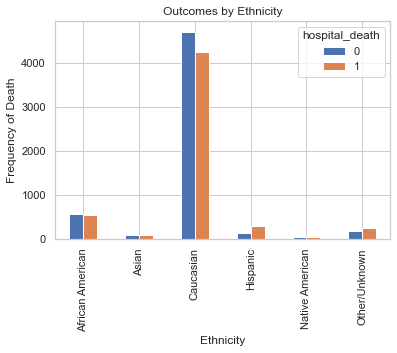

time: 366 ms (started: 2022-12-05 10:20:06 -05:00)


In [26]:
# Outcome by ethicity
%matplotlib inline
pd.crosstab(df1.ethnicity ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency of Death')
plt.savefig('death_ethnicity')

In [27]:
df1.groupby('gender').mean()

/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/1301234238.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('gender').mean()


,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
gender,,,,,,,,,,,,,,,,,,,,,
F,0.493432,65.164779,28.97210,0.116505,161.699448,585.299829,1.040397,75.806884,3.133067,4.972587,...,0.222920,0.466591,0.000381,0.017895,0.215115,0.014468,0.037122,0.010280,0.006092,0.030840
M,0.482841,64.123702,28.34608,0.120881,176.459092,583.696261,1.008279,88.188030,3.160662,4.990610,...,0.247738,0.473280,0.001366,0.025610,0.227932,0.021513,0.035855,0.010586,0.008195,0.029537


time: 43.3 ms (started: 2022-12-05 10:20:06 -05:00)


In [28]:
df1.groupby('elective_surgery').mean()

/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/3093909503.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('elective_surgery').mean()


,hospital_death,age,bmi,height,icu_id,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
elective_surgery,,,,,,,,,,,,,,,,,,,,
0,0.519918,64.452228,28.593572,169.432187,581.156691,0.942359,82.155416,3.110623,4.925026,3.468335,0.223902,0.457406,0.001021,0.024106,0.221757,0.019714,0.038407,0.011645,0.007559,0.030439
1,0.250000,65.830149,29.001794,169.838629,608.912879,1.625001,83.658583,3.421970,5.405303,3.946970,0.325758,0.564394,0.000000,0.006061,0.222727,0.006818,0.021970,0.001515,0.004545,0.028030


time: 33.1 ms (started: 2022-12-05 10:20:07 -05:00)


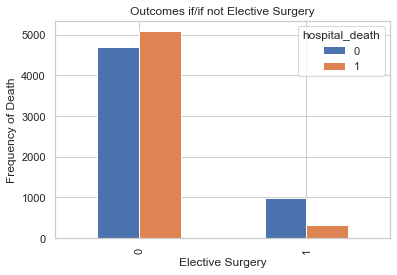

time: 262 ms (started: 2022-12-05 10:20:07 -05:00)


In [29]:
# Outcome by elective surgery
%matplotlib inline
pd.crosstab(df1.elective_surgery ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes if/if not Elective Surgery')
plt.xlabel('Elective Surgery')
plt.ylabel('Frequency of Death')
plt.savefig('outcome_elective_surgery')

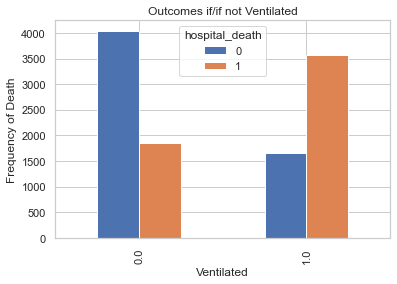

time: 322 ms (started: 2022-12-05 10:20:07 -05:00)


In [30]:
# Outcome if ventilated
%matplotlib inline
pd.crosstab(df1.ventilated_apache ,df1.hospital_death).plot(kind='bar')
plt.title('Outcomes if/if not Ventilated')
plt.xlabel('Ventilated')
plt.ylabel('Frequency of Death')
plt.savefig('outcome_ventilated')

In [31]:
dfc=df1[['hospital_death','age','bmi','height','pre_icu_los_days','weight']]
dfc.head()

,hospital_death,age,bmi,height,pre_icu_los_days,weight
0,1,62.000000,50.443888,165.1,0.000000,137.50
2,1,66.000000,37.640312,165.1,4.966667,102.60
3,1,64.615941,22.714002,154.9,0.006250,54.50
4,1,83.000000,34.343517,162.6,0.006944,90.80
5,1,82.000000,21.579839,177.8,0.222222,68.22


time: 8.73 ms (started: 2022-12-05 10:20:07 -05:00)


Feature Selection I - Continuous Variables

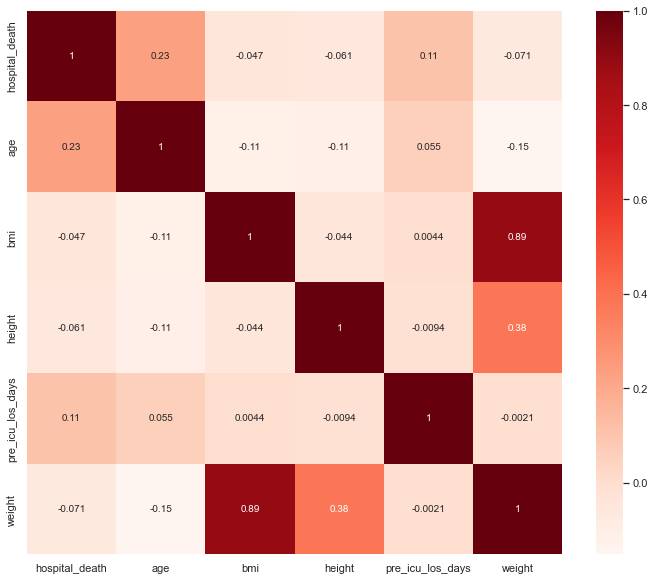

time: 365 ms (started: 2022-12-05 10:20:07 -05:00)


In [32]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dfc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
# List quantitative  features in descending order of correlation (absolute value) - note gcs_... are ordinal
dfc[dfc.columns[0:]].corr().abs()['hospital_death'][:].sort_values(ascending=False)

hospital_death      1.000000
age                 0.233602
pre_icu_los_days    0.106043
weight              0.070627
height              0.060727
bmi                 0.047101
Name: hospital_death, dtype: float64

time: 5.87 ms (started: 2022-12-05 10:20:08 -05:00)


In [34]:
#Correlation with output variable
cor_target = abs(cor['hospital_death'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

hospital_death    1.0
Name: hospital_death, dtype: float64

time: 3.87 ms (started: 2022-12-05 10:20:08 -05:00)


None of the continuous features are even moderately correlated with the target variable (hospital_death). However, we will keep most of them in the model for now. 

In [35]:
print(dfc[['weight','bmi']].corr())

          weight       bmi
weight  1.000000  0.888932
bmi     0.888932  1.000000
time: 4.55 ms (started: 2022-12-05 10:20:08 -05:00)


bmi is based on weight and height.  bmi and weight are highly correlated.  Weight is more highly correlated with the target variable, so we will drop bmi from the features. Height has a very weak/no correlation (-0.02) with hospital_death, so it will also be dropped from the features.

In [36]:
# Drop features bmi and height
df1.drop(['bmi','height'],axis =1, inplace = True)

time: 2.2 ms (started: 2022-12-05 10:20:08 -05:00)


Feature Selection II - Ordinal and Categorical Variables

In [37]:
x=df1[['elective_surgery', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem']]
y=df1[['hospital_death']]


time: 5.09 ms (started: 2022-12-05 10:20:08 -05:00)


In [38]:
oe=OrdinalEncoder()
oe.fit(x)
xen=oe.transform(x)

time: 39.2 ms (started: 2022-12-05 10:20:08 -05:00)


In [39]:
y=y.values

time: 479 µs (started: 2022-12-05 10:20:08 -05:00)


In [40]:
f_score=chi2(xen,y)   #returns f score and p value 
f_score

(array([2.98876914e+02, 8.97310895e+00, 5.87861921e-01, 1.76033176e+01,
        1.14028253e+02, 7.63458222e+00, 9.94648752e+02, 1.12151084e+03,
        2.13397275e+03, 6.42667788e+02, 8.05035969e+02, 3.89983852e+00,
        3.77375552e+01, 1.80881239e+01, 3.24264830e+01, 4.35988995e+01,
        2.78475510e+01, 8.41873748e+00, 6.11986394e+01, 3.89518477e+02,
        3.44292003e+02]),
 array([5.78702694e-067, 2.73982000e-003, 4.43247094e-001, 2.72113219e-005,
        1.28464945e-026, 5.72596469e-003, 2.61479383e-218, 6.97699149e-246,
        0.00000000e+000, 8.78489560e-142, 4.33665612e-177, 4.82907490e-002,
        8.09313752e-010, 2.10912845e-005, 1.23787945e-008, 4.03065638e-011,
        1.31260106e-007, 3.71373584e-003, 5.15971750e-015, 1.05367211e-086,
        7.41593087e-077]))

time: 15.4 ms (started: 2022-12-05 10:20:08 -05:00)


In [41]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)


time: 1.73 ms (started: 2022-12-05 10:20:08 -05:00)


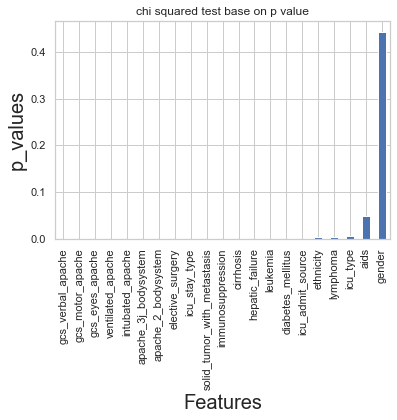

time: 275 ms (started: 2022-12-05 10:20:08 -05:00)


In [42]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

Observation:

The p-values of all the categorical/ordinal features are less than 0.5

In [43]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(xen, y)
xen_fs = fs.transform(xen)

time: 7.08 ms (started: 2022-12-05 10:20:08 -05:00)


Feature 0: 298.876914
Feature 1: 8.973109
Feature 2: 0.587862
Feature 3: 17.603318
Feature 4: 114.028253
Feature 5: 7.634582
Feature 6: 994.648752
Feature 7: 1121.510836
Feature 8: 2133.972751
Feature 9: 642.667788
Feature 10: 805.035969
Feature 11: 3.899839
Feature 12: 37.737555
Feature 13: 18.088124
Feature 14: 32.426483
Feature 15: 43.598900
Feature 16: 27.847551
Feature 17: 8.418737
Feature 18: 61.198639
Feature 19: 389.518477
Feature 20: 344.292003


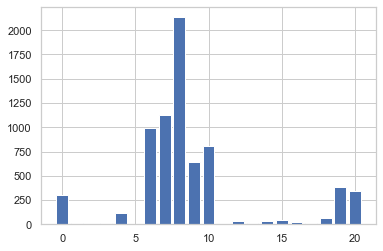

time: 169 ms (started: 2022-12-05 10:20:08 -05:00)


In [44]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [45]:
xcols = x.columns
xcols
xen_df=pd.DataFrame(xen, columns=[['elective_surgery', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache',
       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
       'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
       'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem']])


time: 1.35 ms (started: 2022-12-05 10:20:08 -05:00)


Categorical correlation with hospital_death

The features with the 10 highest chi_squared scores are:

1. gcs_verbal_apache: 3973.680761
2. ventilated_apache: 2917.871559
3. gcs_motor_apache: 2443.454158
4. intubated_apache: 2141.203429
5. gcs_eyes_apache: 2072.880062
6. apache_3j_bodysystem: 956.178417
7. apache_2_bodysystem: 647.666241
8. elective_surgery: 574.005266
9. solid_tumor_with_metastasis: 209.232368
10. immunosuppression: 163.490341

The features with the 11 lowest chi_squared scores are:
1. ethnicity: 0.490519
2. gender: 1.727071
3. aids: 2.475031
4. diabetes_melitus: 13.972007 
5. icu_stay_type: 15.214560
6. icu_type: 16.920213
7. lymphoma: 30.305036
8. icu_admit_source: 59.119011
9. leukemia: 80.127508
10. hepatic_failure: 135.630778
11. cirrhosis: 142.892650




In [46]:
df_cat_v1=x

time: 675 µs (started: 2022-12-05 10:20:08 -05:00)


In [47]:
df_cat_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11110 entries, 0 to 12000
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elective_surgery             11110 non-null  int64  
 1   ethnicity                    11110 non-null  object 
 2   gender                       11110 non-null  object 
 3   icu_admit_source             11110 non-null  object 
 4   icu_stay_type                11110 non-null  object 
 5   icu_type                     11110 non-null  object 
 6   gcs_eyes_apache              11110 non-null  float64
 7   gcs_motor_apache             11110 non-null  float64
 8   gcs_verbal_apache            11110 non-null  float64
 9   intubated_apache             11110 non-null  float64
 10  ventilated_apache            11110 non-null  float64
 11  aids                         11110 non-null  float64
 12  cirrhosis                    11110 non-null  float64
 13  diabetes_mellitu

In [48]:
#Review df1 dataframe before proceeding with removing features

analyse_df(df1)

General Info:
11110 Rows 26 Columns
0 Duplicated Rows
Memory Usage: 2.29Mb

Columns int64: ['hospital_death', 'elective_surgery', 'icu_id']

Columns float64: ['age', 'pre_icu_los_days', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

Columns object: ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


,hospital_death,age,elective_surgery,icu_id,pre_icu_los_days,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000
mean,0.487849,64.615941,0.118812,584.454455,1.023465,82.334010,3.147615,4.982088,3.525203,0.236004,0.470117,0.000900,0.021962,0.221872,0.018182,0.036454,0.010441,0.007201,0.030153
std,0.499875,15.962678,0.323582,215.600197,2.946232,25.392996,1.180829,1.754575,1.763454,0.424644,0.499129,0.029989,0.146567,0.415524,0.133615,0.187424,0.101651,0.084555,0.171016
min,0.000000,16.000000,0.000000,82.000000,0.000000,38.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.000000,0.000000,504.000000,0.036806,64.900000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,66.000000,0.000000,611.000000,0.155556,78.700000,4.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,77.000000,0.000000,772.000000,0.460417,95.300000,4.000000,6.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,1.000000,927.000000,84.367361,186.000000,4.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Checking Missing Values:
Analyzed DataFrame has no missing values

Checking Linear Correlation:
Linear Correlation found between columns gcs_motor_apache and gcs_eyes_apache -> Pearson coef. = 0.85
Linear Correlation found between columns gcs_verbal_apache and gcs_eyes_apache -> Pearson coef. = 0.83
Linear Correlation found between columns gcs_verbal_apache and gcs_motor_apache -> Pearson coef. = 0.76
time: 124 ms (started: 2022-12-05 10:20:08 -05:00)


/var/folders/sm/nxgvg94n5kgbj5lyrcs8lk6w0000gn/T/ipykernel_43819/1137909244.py:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


We will exclude the features with the 11 lowest chi-squared scores from the model.  We will also remove gcs_eyes_apache as it highly correlated with both gcs_motor_apache and gcs_verbal_apache

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11110 entries, 0 to 12000
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               11110 non-null  int64  
 1   age                          11110 non-null  float64
 2   elective_surgery             11110 non-null  int64  
 3   ethnicity                    11110 non-null  object 
 4   gender                       11110 non-null  object 
 5   icu_admit_source             11110 non-null  object 
 6   icu_id                       11110 non-null  int64  
 7   icu_stay_type                11110 non-null  object 
 8   icu_type                     11110 non-null  object 
 9   pre_icu_los_days             11110 non-null  float64
 10  weight                       11110 non-null  float64
 11  gcs_eyes_apache              11110 non-null  float64
 12  gcs_motor_apache             11110 non-null  float64
 13  gcs_verbal_apach

In [50]:
# Create new dataset with features to be kept

dfnc=df1[['age','elective_surgery','pre_icu_los_days','weight','gcs_motor_apache','gcs_verbal_apache','intubated_apache','ventilated_apache','apache_3j_bodysystem','apache_2_bodysystem','solid_tumor_with_metastasis','immunosuppression','hospital_death']]

time: 2.6 ms (started: 2022-12-05 10:20:08 -05:00)


In [51]:
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11110 entries, 0 to 12000
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          11110 non-null  float64
 1   elective_surgery             11110 non-null  int64  
 2   pre_icu_los_days             11110 non-null  float64
 3   weight                       11110 non-null  float64
 4   gcs_motor_apache             11110 non-null  float64
 5   gcs_verbal_apache            11110 non-null  float64
 6   intubated_apache             11110 non-null  float64
 7   ventilated_apache            11110 non-null  float64
 8   apache_3j_bodysystem         11110 non-null  object 
 9   apache_2_bodysystem          11110 non-null  object 
 10  solid_tumor_with_metastasis  11110 non-null  float64
 11  immunosuppression            11110 non-null  float64
 12  hospital_death               11110 non-null  int64  
dtypes: float64(9), i

In [52]:
dfnc.head()

,age,elective_surgery,pre_icu_los_days,weight,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,apache_3j_bodysystem,apache_2_bodysystem,solid_tumor_with_metastasis,immunosuppression,hospital_death
0,62.000000,0,0.000000,137.50,6.0,5.0,0.0,0.0,Sepsis,Cardiovascular,0.0,0.0,1
2,66.000000,0,4.966667,102.60,6.0,5.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0.0,1
3,64.615941,0,0.006250,54.50,3.0,1.0,0.0,1.0,Sepsis,Cardiovascular,0.0,0.0,1
4,83.000000,0,0.006944,90.80,6.0,5.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0,0.0,1
5,82.000000,0,0.222222,68.22,6.0,2.0,1.0,1.0,Neurological,Neurologic,0.0,0.0,1


time: 15.2 ms (started: 2022-12-05 10:20:08 -05:00)


In [53]:
dfnc.columns

Index(['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'gcs_motor_apache', 'gcs_verbal_apache', 'intubated_apache',
       'ventilated_apache', 'apache_3j_bodysystem', 'apache_2_bodysystem',
       'solid_tumor_with_metastasis', 'immunosuppression', 'hospital_death'],
      dtype='object')

time: 3.15 ms (started: 2022-12-05 10:20:08 -05:00)


In [54]:
#Convert categorical variable into dummy/indicator variables

cat_cols=['gcs_motor_apache', 'gcs_verbal_apache',  'apache_3j_bodysystem', 'apache_2_bodysystem']


# Create a copy of the data frame in memory with a different name
df3=dfnc.copy()
#convert only categorical variables/features to dummy/one-hot features
df3 = pd.get_dummies(dfnc, columns=cat_cols, prefix = cat_cols)
df3.head()

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,hospital_death,gcs_motor_apache_1.0,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined diagnoses
0,62.000000,0,0.000000,137.50,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,66.000000,0,4.966667,102.60,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,64.615941,0,0.006250,54.50,0.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,83.000000,0,0.006944,90.80,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
5,82.000000,0,0.222222,68.22,1.0,1.0,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0


time: 28.2 ms (started: 2022-12-05 10:20:08 -05:00)


In [55]:
X=df3.drop('hospital_death', axis=1)
y=df3['hospital_death']
X.shape, y.shape


((11110, 39), (11110,))

time: 5.38 ms (started: 2022-12-05 10:20:08 -05:00)


In [56]:
#Scale the numeric features

con_vars=['age','pre_icu_los_days','weight']
object= StandardScaler()
X[con_vars] = object.fit_transform(X[con_vars])
X.head(10)

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,gcs_motor_apache_1.0,gcs_motor_apache_2.0,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined diagnoses
0,-0.163886,0,-0.347396,2.172586,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.086710,0,1.338448,0.798130,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.000000,0,-0.345275,-1.096179,0.0,1.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1.151742,0,-0.345039,0.333414,0.0,0.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1.089093,0,-0.271967,-0.555848,1.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0.337306,0,-0.291296,-1.115870,1.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,-0.163886,0,-0.325475,-0.202191,0.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
10,-1.103620,0,-0.321703,-0.918957,1.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0
11,1.026444,0,-0.347396,-1.722364,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
12,-1.918057,0,-0.344096,0.553957,0.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,0,0


time: 33.4 ms (started: 2022-12-05 10:20:09 -05:00)


In [57]:
# Revisit class imbalance

df3['hospital_death'].value_counts()

0    5690
1    5420
Name: hospital_death, dtype: int64

time: 4.09 ms (started: 2022-12-05 10:20:09 -05:00)


In [58]:
'''
# Apply SMOTE (Synthetic Minority Oversampling Technique)
# Borderline SMOTE uses a Support Vector Machine model (SVM) to calculate the 
# decision boundary, compared to the K nearest neighbours (KNN) model used in regular SMOTE.

oversampled = BorderlineSMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X, y)
'''

'\n# Apply SMOTE (Synthetic Minority Oversampling Technique)\n# Borderline SMOTE uses a Support Vector Machine model (SVM) to calculate the \n# decision boundary, compared to the K nearest neighbours (KNN) model used in regular SMOTE.\n\noversampled = BorderlineSMOTE(random_state=0)\nX_train_smote, y_train_smote = oversampled.fit_resample(X, y)\n'

time: 3.81 ms (started: 2022-12-05 10:20:09 -05:00)


In [59]:
# y_train_smote.value_counts()

time: 288 µs (started: 2022-12-05 10:20:09 -05:00)


In [60]:
# X=X_train_smote
# y=y_train_smote

time: 332 µs (started: 2022-12-05 10:20:09 -05:00)


In [61]:
# Feature selection using Recursive Feature Elimination with Cross Validation and Random Forest estimator  
# create a random forest model
rf = RandomForestClassifier(random_state=42)

# Recursively eliminate features with cross validation
rfecv = RFECV(estimator=rf, cv=10, scoring='roc_auc')
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("Num Features Before:", X.shape[1])
print("Num Features After:", X_new.shape[1])

Num Features Before: 39
Num Features After: 23
time: 7min 4s (started: 2022-12-05 10:20:09 -05:00)


In [62]:
features_kept = pd.DataFrame({'columns': X.columns,'Kept': rfecv.support_})
features_kept

,columns,Kept
0,age,True
1,elective_surgery,True
2,pre_icu_los_days,True
3,weight,True
4,intubated_apache,True
5,ventilated_apache,True
6,solid_tumor_with_metastasis,True
7,immunosuppression,True
8,gcs_motor_apache_1.0,True
9,gcs_motor_apache_2.0,False


time: 6.3 ms (started: 2022-12-05 10:27:13 -05:00)


In [63]:
#List the features to keep for model
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11110 entries, 0 to 12000
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      11110 non-null  float64
 1   elective_surgery                         11110 non-null  int64  
 2   pre_icu_los_days                         11110 non-null  float64
 3   weight                                   11110 non-null  float64
 4   intubated_apache                         11110 non-null  float64
 5   ventilated_apache                        11110 non-null  float64
 6   solid_tumor_with_metastasis              11110 non-null  float64
 7   immunosuppression                        11110 non-null  float64
 8   gcs_motor_apache_1.0                     11110 non-null  uint8  
 9   gcs_motor_apache_5.0                     11110 non-null  uint8  
 10  gcs_motor_apache_6.0                     11110

In [64]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.head()

,age,elective_surgery,pre_icu_los_days,weight,intubated_apache,ventilated_apache,solid_tumor_with_metastasis,immunosuppression,gcs_motor_apache_1.0,gcs_motor_apache_5.0,...,gcs_verbal_apache_5.0,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Undefined diagnoses
0,-0.163886,0,-0.347396,2.172586,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,0.086710,0,1.338448,0.798130,0.0,0.0,0.0,0.0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0.000000,0,-0.345275,-1.096179,0.0,1.0,0.0,0.0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1.151742,0,-0.345039,0.333414,0.0,0.0,0.0,0.0,0,0,...,1,1,0,0,0,1,0,0,0,0
5,1.089093,0,-0.271967,-0.555848,1.0,1.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


time: 30.5 ms (started: 2022-12-05 10:27:13 -05:00)


In [65]:
X_new_df.columns

Index(['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'intubated_apache', 'ventilated_apache', 'solid_tumor_with_metastasis',
       'immunosuppression', 'gcs_motor_apache_1.0', 'gcs_motor_apache_5.0',
       'gcs_motor_apache_6.0', 'gcs_verbal_apache_1.0',
       'gcs_verbal_apache_4.0', 'gcs_verbal_apache_5.0',
       'apache_3j_bodysystem_Cardiovascular', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis',
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object')

time: 5.19 ms (started: 2022-12-05 10:27:13 -05:00)


In [66]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, 14, 12,  4,  1,  1,  1,  9,  6,
        1,  1,  1,  5, 11, 17, 16,  1, 15,  7,  1,  1, 10,  1,  1, 13,  1,
        1,  8,  2,  3,  1])

time: 7.64 ms (started: 2022-12-05 10:27:13 -05:00)


In [67]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 23
time: 460 µs (started: 2022-12-05 10:27:13 -05:00)


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


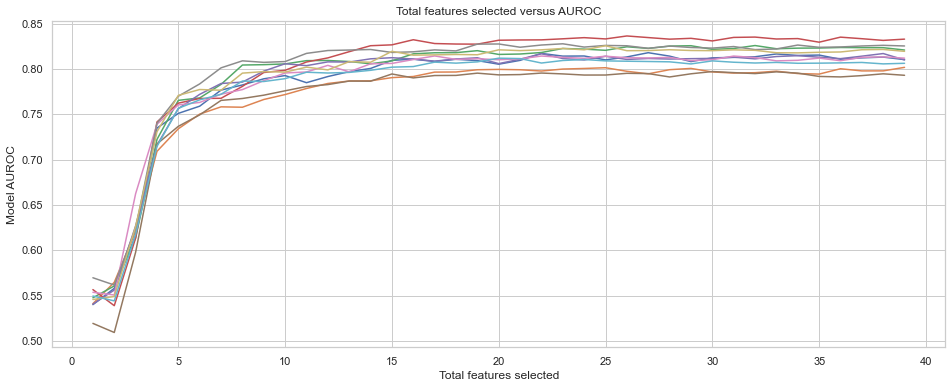

time: 257 ms (started: 2022-12-05 10:27:13 -05:00)


In [68]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus AUROC')
plt.xlabel('Total features selected')
plt.ylabel('Model AUROC')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [69]:
logit_model=sm.Logit(y,X_new_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.502417
         Iterations 6
                                                           Results: Logit
Model:                                     Logit                                  Pseudo R-squared:                       0.275     
Dependent Variable:                        hospital_death                         AIC:                                    11207.7013
Date:                                      2022-12-05 10:27                       BIC:                                    11368.6445
No. Observations:                          11110                                  Log-Likelihood:                         -5581.9   
Df Model:                                  21                                     LL-Null:                                -7697.6   
Df Residuals:                              11088                                  LLR p-value:                            0.0000    
Converged:                

In [70]:
X_new_df.columns

Index(['age', 'elective_surgery', 'pre_icu_los_days', 'weight',
       'intubated_apache', 'ventilated_apache', 'solid_tumor_with_metastasis',
       'immunosuppression', 'gcs_motor_apache_1.0', 'gcs_motor_apache_5.0',
       'gcs_motor_apache_6.0', 'gcs_verbal_apache_1.0',
       'gcs_verbal_apache_4.0', 'gcs_verbal_apache_5.0',
       'apache_3j_bodysystem_Cardiovascular', 'apache_3j_bodysystem_Metabolic',
       'apache_3j_bodysystem_Respiratory', 'apache_3j_bodysystem_Sepsis',
       'apache_2_bodysystem_Cardiovascular',
       'apache_2_bodysystem_Gastrointestinal', 'apache_2_bodysystem_Metabolic',
       'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Undefined diagnoses'],
      dtype='object')

time: 3.12 ms (started: 2022-12-05 10:27:14 -05:00)


In [71]:
 X2_df=X_new_df

time: 461 µs (started: 2022-12-05 10:27:14 -05:00)


Logistic Regresssion with Stratified K-Fold CV

[0.83349114 0.81889636 0.82965519 0.85059242 0.8331377  0.81695731
 0.83498596 0.86229483 0.83618247 0.82226863]
AUROC: 0.834 (0.013)
Confusion Matrix: 


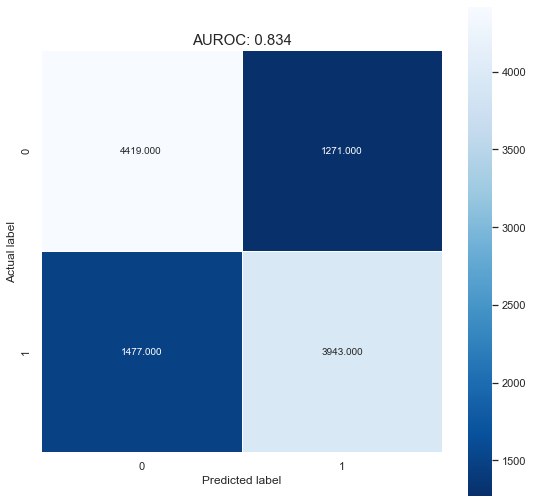

time: 4.08 s (started: 2022-12-05 10:27:14 -05:00)


In [72]:
logR = LogisticRegression(solver='liblinear')
lscore = cross_val_score(logR, X2_df, y, scoring='roc_auc', cv=10, n_jobs=-1) 
print(lscore)
print('AUROC: %.3f (%.3f)' % (lscore.mean(), lscore.std()))
y_predl = cross_val_predict(logR, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predl)
print('Confusion Matrix: ')
lrmean = round(lscore.mean(),3)
lrstd = round(lscore.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(lrmean)
plt.title(all_sample_title, size = 15);

In [73]:
print(classification_report(y, y_predl))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      5690
           1       0.76      0.73      0.74      5420

    accuracy                           0.75     11110
   macro avg       0.75      0.75      0.75     11110
weighted avg       0.75      0.75      0.75     11110

time: 19.9 ms (started: 2022-12-05 10:27:18 -05:00)


In [74]:
logit_model=sm.Logit(y,X2_df)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.502417
         Iterations 6
                                                           Results: Logit
Model:                                     Logit                                  Pseudo R-squared:                       0.275     
Dependent Variable:                        hospital_death                         AIC:                                    11207.7013
Date:                                      2022-12-05 10:27                       BIC:                                    11368.6445
No. Observations:                          11110                                  Log-Likelihood:                         -5581.9   
Df Model:                                  21                                     LL-Null:                                -7697.6   
Df Residuals:                              11088                                  LLR p-value:                            0.0000    
Converged:                

In [75]:
clf = LogisticRegressionCV(cv=10, max_iter=10000, random_state=27, scoring='roc_auc').fit(X2_df, y)
clf.score(X2_df, y)

0.8352171868818863

time: 1.69 s (started: 2022-12-05 10:27:18 -05:00)


In [76]:
crossval_scores = cross_val_score(LogisticRegression(max_iter=1000), X2_df, y, scoring='roc_auc', cv=10)

time: 424 ms (started: 2022-12-05 10:27:19 -05:00)


In [77]:
crossval_scores.mean()

0.8338458744868644

time: 2.41 ms (started: 2022-12-05 10:27:20 -05:00)


In [78]:
phd=clf.predict_proba(X2_df)
s=pd.DataFrame(phd)
s.head(10)

,0,1
0,0.691278,0.308722
1,0.673008,0.326992
2,0.141755,0.858245
3,0.664261,0.335739
4,0.191516,0.808484
5,0.074057,0.925943
6,0.158970,0.841030
7,0.150112,0.849888
8,0.535078,0.464922
9,0.341794,0.658206


time: 10.1 ms (started: 2022-12-05 10:27:20 -05:00)


In [79]:
y_pred = clf.predict(X2_df)
print('AUROC of logistic regression classifier on test set: {:.2f}'.format(clf.score(X2_df, y)))


AUROC of logistic regression classifier on test set: 0.84
time: 11.9 ms (started: 2022-12-05 10:27:20 -05:00)


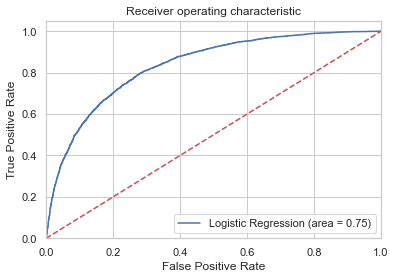

time: 234 ms (started: 2022-12-05 10:27:20 -05:00)


In [80]:
logit_roc_auc = roc_auc_score(y, clf.predict(X2_df))
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X2_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
cv = StratifiedKFold(n_splits=10,shuffle=False)

time: 377 µs (started: 2022-12-05 10:27:20 -05:00)


Gaussian Naive Bayes with Stratified K-Fold CV

[0.81843267 0.79487545 0.80176914 0.81659252 0.79596495 0.79757002
 0.80131194 0.83556314 0.80721016 0.79207388]
AUROC: 0.806 (0.013)
Confusion Matrix: 


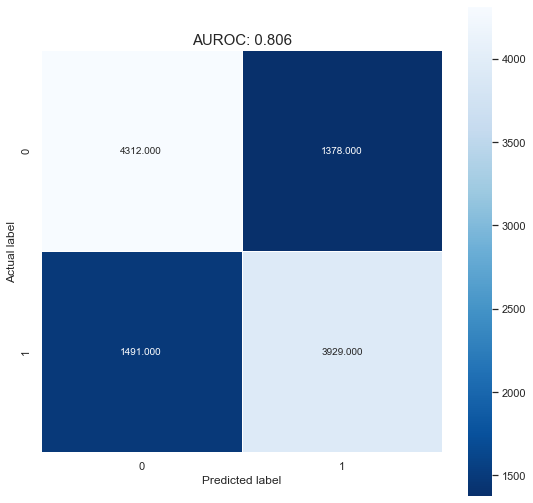

time: 361 ms (started: 2022-12-05 10:27:20 -05:00)


In [82]:
naiveB = GaussianNB()
score = cross_val_score(naiveB, X2_df, y, scoring='roc_auc', cv=10, n_jobs=-1) 
print(score)
print('AUROC: %.3f (%.3f)' % (score.mean(), score.std()))
y_predn = cross_val_predict(naiveB, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predn)
print('Confusion Matrix: ')
nbmean = round(score.mean(),3)
nbstd = round(score.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(nbmean)
plt.title(all_sample_title, size = 15);

In [83]:
gnb2 = GaussianNB()
cv = StratifiedKFold(n_splits=10,shuffle=False)

time: 564 µs (started: 2022-12-05 10:27:21 -05:00)


In [84]:
print(classification_report(y, y_predn))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5690
           1       0.74      0.72      0.73      5420

    accuracy                           0.74     11110
   macro avg       0.74      0.74      0.74     11110
weighted avg       0.74      0.74      0.74     11110

time: 22.4 ms (started: 2022-12-05 10:27:21 -05:00)


In [85]:
clg = GaussianNB().fit(X2_df, y)
clg.score(X2_df, y)

0.7417641764176418

time: 23.6 ms (started: 2022-12-05 10:27:21 -05:00)


In [86]:
gna=clg.predict_proba(X2_df)
u=pd.DataFrame(gna)
u.head(10)

,0,1
0,7.196704e-01,0.280330
1,8.610588e-01,0.138941
2,2.564543e-04,0.999744
3,9.670436e-01,0.032956
4,5.136429e-02,0.948636
5,1.488752e-08,1.000000
6,4.094954e-07,1.000000
7,4.179312e-08,1.000000
8,6.883355e-01,0.311665
9,2.508250e-06,0.999997


time: 14.7 ms (started: 2022-12-05 10:27:21 -05:00)


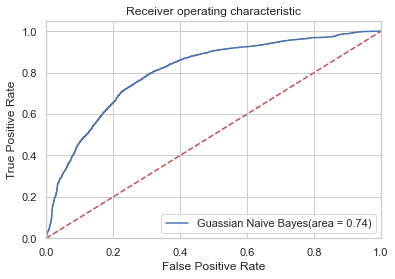

time: 249 ms (started: 2022-12-05 10:27:21 -05:00)


In [87]:
gnb_roc_auc = roc_auc_score(y, clg.predict(X2_df))
fpr, tpr, thresholds = roc_curve(y, clg.predict_proba(X2_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Guassian Naive Bayes(area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

XGBoost with Stratified K-Fold CV

[0.82256694 0.80931783 0.82302739 0.84513518 0.82155526 0.79477818
 0.82134612 0.84446235 0.81424328 0.8222135 ]
AUROC: 0.822 (0.014)
Confusion Matrix: 


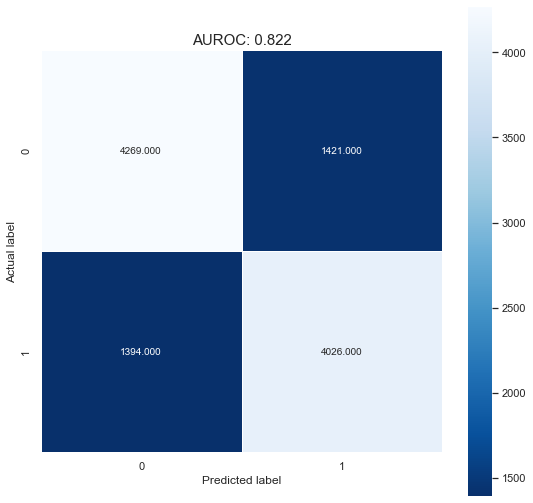

time: 12.8 s (started: 2022-12-05 10:27:21 -05:00)


In [88]:
classifier = XGBClassifier()
accuracies = cross_val_score(estimator = classifier, X=X2_df, y=y, cv = 10, scoring='roc_auc')
print(accuracies)
print('AUROC: %.3f (%.3f)' % (accuracies.mean(), accuracies.std()))
# How to train XG Boost
classifier.fit(X2_df, y)
y_predx = cross_val_predict(classifier, X2_df, y, cv=10)
#Confusion Matrix
conf_mat = confusion_matrix(y, y_predx)
print('Confusion Matrix: ')
nbmean = round(accuracies.mean(),3)
nbstd = round(accuracies.std(),3)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'AUROC: {0}'.format(nbmean)
plt.title(all_sample_title, size = 15);

In [89]:
print(classification_report(y, y_predx))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5690
           1       0.74      0.74      0.74      5420

    accuracy                           0.75     11110
   macro avg       0.75      0.75      0.75     11110
weighted avg       0.75      0.75      0.75     11110

time: 22.4 ms (started: 2022-12-05 10:27:34 -05:00)


In [90]:
clx = XGBClassifier(cv=10, max_iter=10000, random_state=27, scoring='roc_auc').fit(X2_df, y)
clx.score(X2_df, y)

[10:27:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "cv", "max_iter", "scoring" } are not used.



0.8928892889288929

time: 667 ms (started: 2022-12-05 10:27:34 -05:00)


In [91]:
xga=clx.predict_proba(X2_df)
t=pd.DataFrame(xga)
t.head(10)

,0,1
0,0.380052,0.619948
1,0.448996,0.551004
2,0.026246,0.973754
3,0.573665,0.426335
4,0.049873,0.950127
5,0.031465,0.968535
6,0.076126,0.923874
7,0.134340,0.865660
8,0.248201,0.751799
9,0.052779,0.947221


time: 23 ms (started: 2022-12-05 10:27:34 -05:00)


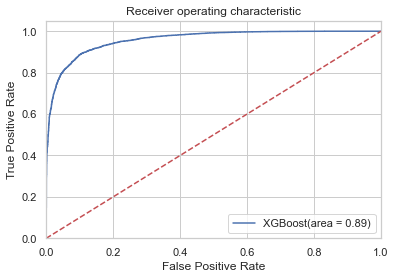

time: 289 ms (started: 2022-12-05 10:27:34 -05:00)


In [92]:
xgb_roc_auc = roc_auc_score(y, clx.predict(X2_df))
fpr, tpr, thresholds = roc_curve(y, clx.predict_proba(X2_df)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost(area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()